<a href="https://colab.research.google.com/github/kanticha954/testML/blob/main/Reduced_Overfitting_heart_attack_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import AgglomerativeClustering
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/code?datasetId=1226038&searchQuery=hold+out
df = pd.read_csv('/content/drive/MyDrive/ML - Report/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
import scipy.stats as stats
data = np.array(df)
zscores = stats.zscore(data)

print(zscores)

[[ 0.9521966   0.68100522  1.97312292 ... -0.71442887 -2.14887271
   0.91452919]
 [-1.91531289  0.68100522  1.00257707 ... -0.71442887 -0.51292188
   0.91452919]
 [-1.47415758 -1.46841752  0.03203122 ... -0.71442887 -0.51292188
   0.91452919]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  1.24459328  1.12302895
  -1.09345881]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.26508221  1.12302895
  -1.09345881]
 [ 0.29046364 -1.46841752  0.03203122 ...  0.26508221 -0.51292188
  -1.09345881]]


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


ค่า Mean เมื่อเทียบกับค่า Max ในส่วนของ chol หรือ oldpeak นั้นมีค่าที่ต่างกันค่อนข้างมาก ซึ่งแสดงให้เห็นถึงความอ่อนไหวของข้อมูลต่อค่าปกติ

รวมไปถึงเมื่อลองนำค่า Numeric ในชุดข้อมูลมา plot กราฟแล้ว จะเห็นว่าในชุดข้อมูลมีข้อมูลบางตัวที่กระจายตัวโดดออกมา หรือก็คือแสดงให้เห็นว่าชุดข้อมูลนี้มีค่าที่เป็น Outlier อยู่ด้วย

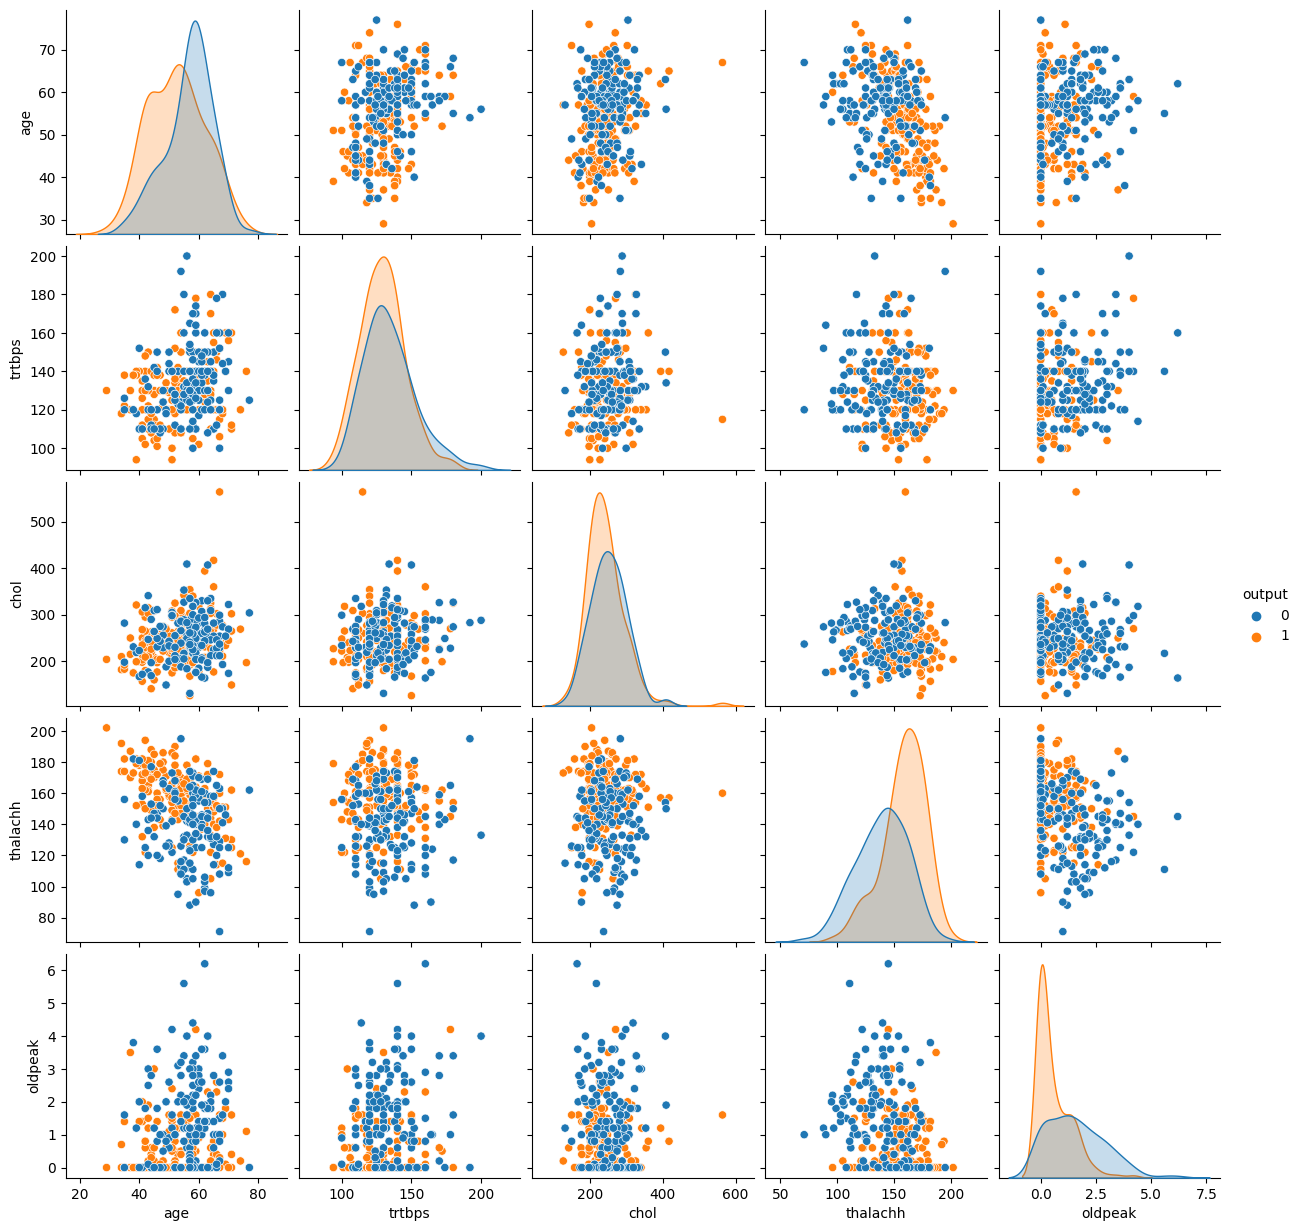

In [ ]:
#Outlier Detection
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

In [ ]:
features = []
for column in df.columns:
    if column != 'output':
        features.append(column)
X = df[features]
y = df['output']

In [ ]:
#First Model
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):

   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]
   model = KNeighborsClassifier(n_neighbors=2)
   model.fit(X_train, y_train)

   y_train_pred = model.predict(X_train)
   y_test_pred = model.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

   print("First Model - Train mae: {} Test mae: {}".format(mae_train, mae_test))


First Model - Train mae: [0.19823788546255505] Test mae: [0.7368421052631579]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572] Test mae: [0.7368421052631579, 0.7763157894736842]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572, 0.1762114537444934] Test mae: [0.7368421052631579, 0.7763157894736842, 0.27631578947368424]
First Model - Train mae: [0.19823788546255505, 0.18061674008810572, 0.1762114537444934, 0.16228070175438597] Test mae: [0.7368421052631579, 0.7763157894736842, 0.27631578947368424, 0.44]


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.56


In [ ]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

42 / 75 correct


In [ ]:
model.fit(X_train, y_train )
answer = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        75
           1       0.00      0.00      0.00         0

    accuracy                           0.56        75
   macro avg       0.50      0.28      0.36        75
weighted avg       1.00      0.56      0.72        75



จากกราฟดังกล่าว จะเป็นการเปรียบเทียบระหว่าง Error ของ training set กับ test set ซึ่งจะเห็นว่า training error นั้นมีค่าที่น้อยมาก (จากกราฟจะมี MAE หรือ Mean absolute error) นั้นมีค่าต่ำกว่า 0.2 เสียอีก ในขณะที่ testing error นั้นมีค่ามากกว่าอย่างเห็นได้ชัด โดยระยะห่างจะอยู่ที่ระหว่าง 0.3 - 0.8

หรืออาจจะกล่าวได้ว่าในขณะที่นำโมเดลนี้ไปเทรนนั้นอาจจะดูเหมือนได้ผลการทำนายที่แม่นยำ ทว่าเมื่อนำไปปรับใช้กับข้อมูลชุดใหม่ (testing set) ค่าความผิดพลาดนั้นกลับมากกว่าอย่างเห็นได้ชัด ซึ่งสิ่งนี้เองที่แสดงให้เห็นถึงภาวะ Overfitting ของชุดข้อมูลนี้

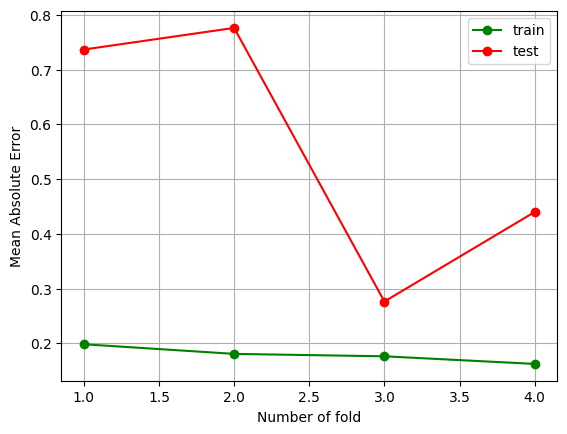

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

#ลด Overfitting

#1. ลดความซับซ้อนของโมเดล
ด้วย function MinMaxScaler ซึ่งหมายถึงการ scale ให้ข้อมูลมีค่าระหว่างสูงสุดและต่ำสุดเท่านั้น งเป็นการทำเพื่อที่ข้อมูลจะไม่ได้รับอิทธิพลจากข้อมูลจำพวก Outlier หรือมีค่าผิดปกติ

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

In [ ]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


จะเห็นว่าหลังทำ MinMaxScaler แล้ว ข้อมูลจะถูกปรับค่าลงมาให้อยู่ในรูปของทศนิยมระหว่าง 0 - 1 ไม่เกินนี้ หลังจากที่ก่อนหน้านี้มีค่าบางอย่างที่เป็นหลักร้อยหรือหลักสิบก็มี

In [ ]:
kf = KFold(n_splits=4)
mae_train = []
mae_test = []
for train_index, test_index in kf.split(X):

   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model_af = KNeighborsClassifier(n_neighbors=2)
   model_af.fit(X_train, y_train)
   y_train_pred = model_af.predict(X_train)
   y_test_pred = model_af.predict(X_test)
   mae_train.append(mean_absolute_error(y_train, y_train_pred))
   mae_test.append(mean_absolute_error(y_test, y_test_pred))

   print("1 Solution - Train mae: {} Test mae: {}".format(mae_train, mae_test))

1 Solution - Train mae: [0.1277533039647577] Test mae: [0.5]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837] Test mae: [0.5, 0.4473684210526316]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837, 0.1013215859030837] Test mae: [0.5, 0.4473684210526316, 0.27631578947368424]
1 Solution - Train mae: [0.1277533039647577, 0.11013215859030837, 0.1013215859030837, 0.10526315789473684] Test mae: [0.5, 0.4473684210526316, 0.27631578947368424, 0.26666666666666666]


In [ ]:
model_af.fit(X_train, y_train )
answer = model_af.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85        75
           1       0.00      0.00      0.00         0

    accuracy                           0.73        75
   macro avg       0.50      0.37      0.42        75
weighted avg       1.00      0.73      0.85        75



In [ ]:
y_pred = model_af.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


In [ ]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

55 / 75 correct


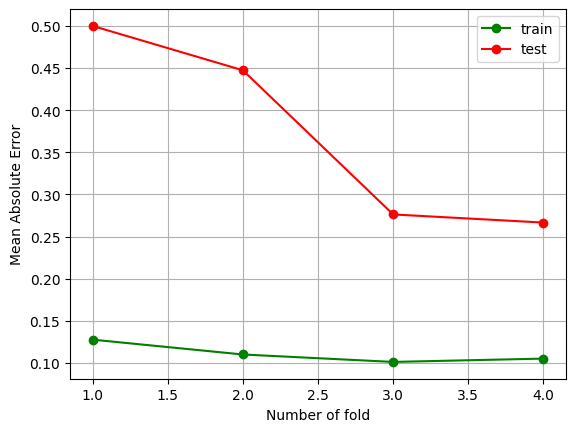

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

ผลลัพธ์ที่ได้คือกราฟดังกล่าวซึ่งค่า Error จาก training set มีแนวโน้มที่จะลดลงมาอย่างเห็นได้ชัด เป็นมีแนวโน้มอยู่ที่ 0.25 - 0.50

#2. เลือก Feature
ใช้การเลือก Features บางส่วนที่มีความสำคัญ เพื่อที่ว่า Model จะไม่จำเป็นต้องเรียนรู้จาก Feature มากมายจนเกินพอดี

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_
dfscores = pd.DataFrame(fit.scores_)
dfcol = pd.DataFrame(X.columns)

In [ ]:
featureScore = pd.concat([dfcol, dfscores], axis = 1)
featureScore.columns = ['Feature', 'Score']

print(featureScore.nlargest(4, 'Score'))

    Feature      Score
8      exng  38.914377
2        cp  20.866033
11      caa  16.610191
9   oldpeak  11.716815


In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Get New Dataset after Feature Selection
X_new  = test.fit_transform(X,y)
print(X_new)

[[1.         0.         0.37096774 0.        ]
 [0.66666667 0.         0.56451613 0.        ]
 [0.33333333 0.         0.22580645 0.        ]
 ...
 [0.         0.         0.5483871  0.5       ]
 [0.         1.         0.19354839 0.25      ]
 [0.33333333 0.         0.         0.25      ]]


In [ ]:
print('Original number of features:', X.shape)
print('Reduced number of features:', X_new.shape)
#เลือกมา 4 features

Original number of features: (303, 13)
Reduced number of features: (303, 4)


In [ ]:
kf = KFold(n_splits=4)
mae_train_2 = []
mae_test_2 = []
for train_index, test_index in kf.split(X_new):

   X_train, X_test = X_new[train_index], X_new[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model_af2 = KNeighborsClassifier(n_neighbors=2)
   model_af2.fit(X_train, y_train)
   y_train_pred = model_af2.predict(X_train)
   y_test_pred = model_af2.predict(X_test)
   mae_train_2.append(mean_absolute_error(y_train, y_train_pred))
   mae_test_2.append(mean_absolute_error(y_test, y_test_pred))

   print("2 Solution - Train mae: {} Test mae: {}".format(mae_train_2, mae_test_2))


2 Solution - Train mae: [0.13656387665198239] Test mae: [0.5394736842105263]
2 Solution - Train mae: [0.13656387665198239, 0.1145374449339207] Test mae: [0.5394736842105263, 0.4473684210526316]
2 Solution - Train mae: [0.13656387665198239, 0.1145374449339207, 0.12334801762114538] Test mae: [0.5394736842105263, 0.4473684210526316, 0.19736842105263158]
2 Solution - Train mae: [0.13656387665198239, 0.1145374449339207, 0.12334801762114538, 0.08771929824561403] Test mae: [0.5394736842105263, 0.4473684210526316, 0.19736842105263158, 0.29333333333333333]


In [ ]:
model_af2.fit(X_train, y_train )
answer = model_af2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        75
           1       0.00      0.00      0.00         0

    accuracy                           0.71        75
   macro avg       0.50      0.35      0.41        75
weighted avg       1.00      0.71      0.83        75



In [ ]:
y_pred = model_af2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7066666666666667


In [ ]:
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))

53 / 75 correct


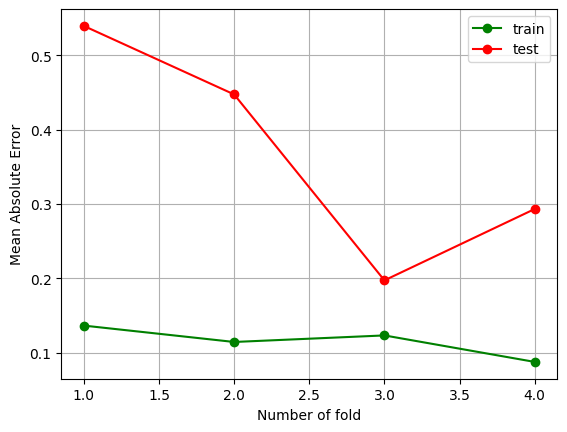

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train_2, 'o-', color='green', label='train')
plt.plot(folds, mae_test_2, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

ด้วยการใช้ Feature Selection นี้เอง ทำให้เห็นว่าค่า MAE ของ Model ระหว่าง Training set และ Testing set เริ่มมีค่าเข้าใกล้กันมาขึ้นจากเดิม นี่เองที่ทำให้เห็นว่า Overfitting น้อยลง โดยจะมีแนวโน้มอยู่ที่ 0.2 - 0.55

#3. เปลี่ยนโมเดล

เมื่อเกิดปัญหา Overfiting อีกวิธีที่สามารถช่วยในการลดปัญหา Overfit ได้คือการลองเปลี่ยนไปใช้โมเดลอื่น ๆ

In [ ]:
#NaiveByes
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=4)
mae_train_gnb = []
mae_test_gnb = []
gnb = GaussianNB()
for train_index, test_index in kf.split(X):

   X_train_gnb, X_test_gnb = X.iloc[train_index], X.iloc[test_index]
   y_train_gnb, y_test_gnb = y[train_index], y[test_index]
   gnb.fit(X_train_gnb, y_train_gnb)
   y_train_pred_gnb = gnb.predict(X_train_gnb)
   y_test_pred_gnb = gnb.predict(X_test_gnb)

   print("Gnb model - Train mae: {} Test mae: {}".format(mae_train_gnb, mae_test_gnb))

   mae_train_gnb.append(mean_absolute_error(y_train_gnb, y_train_pred_gnb))
   mae_test_gnb.append(mean_absolute_error(y_test_gnb, y_test_pred_gnb))

Gnb model - Train mae: [] Test mae: []
Gnb model - Train mae: [0.15859030837004406] Test mae: [0.19736842105263158]
Gnb model - Train mae: [0.15859030837004406, 0.16740088105726872] Test mae: [0.19736842105263158, 0.21052631578947367]
Gnb model - Train mae: [0.15859030837004406, 0.16740088105726872, 0.14096916299559473] Test mae: [0.19736842105263158, 0.21052631578947367, 0.19736842105263158]


In [ ]:
gnb.fit(X_train_gnb, y_train_gnb)
answer = gnb.predict(X_test_gnb)
from sklearn.metrics import classification_report
print(classification_report(y_test_gnb, answer))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        75
           1       0.00      0.00      0.00         0

    accuracy                           0.65        75
   macro avg       0.50      0.33      0.40        75
weighted avg       1.00      0.65      0.79        75



In [ ]:
y_pred = gnb.predict(X_test_gnb)
accuracy = accuracy_score(y_test_gnb, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6533333333333333


In [ ]:
print("{0} / {1} correct".format(np.sum(y_test_gnb == y_pred), len(y_test_gnb)))

49 / 75 correct


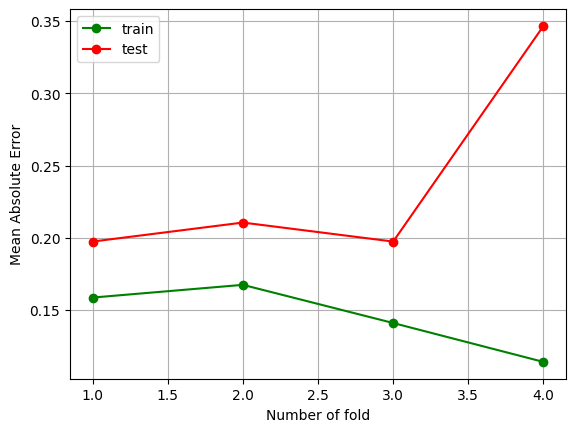

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train_gnb, 'o-', color='green', label='train')
plt.plot(folds, mae_test_gnb, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

โดยตัวโมเดลแรกที่เลือกมาทำคือ Naive Bayes เนื่องจากเป็นโมเดลที่ไม่ได้มีความซับซ้อนมากและค่อนข้างเรียบง่ายจากการที่มันเป็น  Simple (linear) hypothesis function ทำให้ลดปัญหาการเกิด Overfit ได้
ซึ่งจะเห็นว่าค่า MAE ที่ได้มานั้นมีค่าอยู่ที่ระหว่าง 0.20 - 0.35 เท่านั้น

In [ ]:
#LogisticRegression
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=4)
lg = LogisticRegression()
mae_train_lg = []
mae_test_lg = []
train_mae, test_mae = [], []
for train_index, test_index in kf.split(X):

  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  lg.fit(X_train, y_train)
  y_train_predicted = lg.predict(X_train)
  y_test_predicted = lg.predict(X_test)

  mae_train_lg = mean_absolute_error(y_train,  y_train_predicted)
  mae_test_lg = mean_absolute_error(y_test, y_test_predicted)

  train_mae += [mae_train_lg]
  test_mae += [mae_test_lg]

  print("LG model - Train mae : {} Test mae: {}".format(mae_train_lg, mae_test_lg))

LG model - Train mae : 0.15859030837004406 Test mae: 0.2631578947368421
LG model - Train mae : 0.14096916299559473 Test mae: 0.27631578947368424
LG model - Train mae : 0.14977973568281938 Test mae: 0.27631578947368424
LG model - Train mae : 0.11842105263157894 Test mae: 0.44


In [ ]:
lg.fit(X_train, y_train )
answer = lg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        75
           1       0.00      0.00      0.00         0

    accuracy                           0.56        75
   macro avg       0.50      0.28      0.36        75
weighted avg       1.00      0.56      0.72        75



In [ ]:
print(accuracy_score(y_test,y_test_predicted))

0.56


In [ ]:
print("{0} / {1} correct".format(np.sum(y_test == y_test_predicted), len(y_test)))

42 / 75 correct


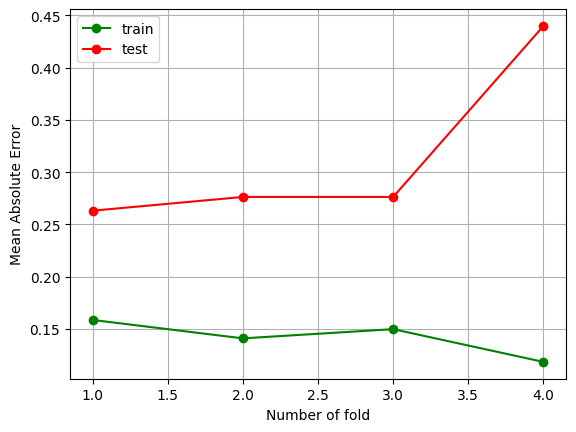

In [ ]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, train_mae, 'o-', color='green', label='train')
plt.plot(folds, test_mae , 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

ถัดมาอีกโมเดลที่ได้นำมาทดลองใช้กับ Dataset นี้คือ LinearRegressor โดยผลลัพธ์ที่ได้คือค่า MAE ได้ลดมาอยู่ในช่วง 0.26 - 0.44 โดยประมาณ